In [1]:
import os

import numpy as np
import pandas as pd

from statsmodels import api as sm
from statsmodels.formula import api as smf

pd.set_option('display.max_rows', 300)

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set()

In [2]:
def _parse_num(x):
    try:
        return float(x)
    except:
        if "-" in x:
            lower, _, upper = x.partition("-")
            return (float(lower) + float(upper)) / 2.0
        return np.NaN
    
def num(col):
    ser = col.map(_parse_num)
    ser[col == "GE95"] = ser[ser >= 95].mean()
    ser[col == "GE90"] = ser[ser >= 90].mean()
    ser[col == "GE80"] = ser[ser >= 80].mean()
    ser[col == "GE50"] = ser[ser >= 50].mean()
    ser[col == "LT50"] = ser[ser < 80].mean()
    ser[col == "LE20"] = ser[ser <= 20].mean()
    ser[col == "LE10"] = ser[ser <= 10].mean()
    ser[col == "LE5"] = ser[ser <= 5].mean()
    return ser

In [3]:
def munge(raw, col_frame="{}_MTH05{}_1617"):

    # Helpers
    def prof(prefix):
        return num(raw[col_frame.format(prefix, "PCTPROF")])
    def val(prefix):
        return num(raw[col_frame.format(prefix, "NUMVALID")]).fillna(0)

    # School identifiers
    df = pd.DataFrame()
    df["state"] = raw.STNAM.str.upper()
    df["school"] = raw.SCHNAM.str.upper()
    df["district_id"] = raw.LEAID
    df["district_name"] = raw.LEANM.str.upper()
    df["fed_school_id"] = raw.NCESSCH

    # Outcomes
    df["prof"] = prof("ALL")
    df["prof_disad"] = prof("ECD")

    # Student group counts
    n = val("ALL").fillna(1.0)
    n_asian = val("MAS")
    n_hispanic = val("MHI")
    n_black = val("MBL")
    n_native = val("MAM")
    n_mixedrace = val("MTR")
    n_disability = val("CWD")
    n_disad = val("ECD")
    n_limited_english = val("LEP")
    n_female = val("F")
    n_homeless = val("HOM")
    n_migrant = val("MIG")
    
    # Covariates
    df["n"] = n
    df["asian"] = n_asian / n
    df["hispanic"] = n_hispanic / n
    df["black"] = n_black / n
    df["native"] = n_native / n
    df["disad"] = n_disad / n
    df["limited_english"] = n_limited_english / n
    df["female"] = n_female / n
    df["homeless"] = n_homeless / n
    df["migrant"] = n_migrant / n

    # Done!
    df = df[n.notnull() & df.prof.notnull()].reset_index(drop=True)
    return df

In [5]:
def load_data(root):
    dfs = []
    for subject in ["math", "reading"]:
        folder = os.path.join(root, subject)
        files = os.listdir(folder)
        for fname in files:
            if not fname.endswith(".csv"):
                continue
            year, _, _ = fname.partition(".")
            year_int = int(year[2:])
            frame = (
                "{}_" +
                ("MTH" if subject == "math" else "RLA") +
                "05{}_" +
                str(year_int - 1) +
                str(year_int)
            )
            try:
                df = pd.read_csv(os.path.join(folder, fname))
                df = munge(df, col_frame=frame)
                df["subject"] = subject
                df["year"] = int(year)
                dfs.append(df)
                print "processed {}.{}".format(subject, year)
            except Exception as e:
                print "failed for {}.{}: {}".format(
                    subject, year, e)
    return pd.concat(dfs)

In [7]:
prof = load_data("/Users/jeffschecter/code/sandbox/edu/")

/Users/jeffschecter/.virtualenvs/stitchfix/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (15,19,21,23,27,29,35,37,39,45,47,49,51,53,65,67,79,81,83,85,91,95,107,109,111,113,115,119,123,125,131,133,135,137,139,141,143,145,147,149,151,153,157,159,175,177,179,181,183,187,191,197,199,205,209,213,217,219,221,223,225,227) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


processed math.2015


/Users/jeffschecter/.virtualenvs/stitchfix/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (13,15,19,21,23,27,33,35,37,39,47,51,53,55,57,59,63,65,69,71,77,79,81,85,87,91,99,103,107,109,111,113,115,117,119,121,123,131,133,135,137,143,145,147,149,151,155,161,165,167,173,175,177,179,187,191,193,195,201,203,209,217,219,221,223,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


processed math.2016


/Users/jeffschecter/.virtualenvs/stitchfix/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (17,19,21,23,25,27,29,35,37,39,41,49,53,55,57,59,61,65,67,69,71,73,75,79,83,91,93,95,97,99,103,105,107,109,111,113,115,117,119,121,123,125,127,129,133,135,137,139,141,145,147,149,151,153,159,161,163,165,167,175,177,179,181,183,185,187,189,191,193,195,197,199,205,207,209,211,213,219,221,223,225,227,229,231) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


processed math.2017


/Users/jeffschecter/.virtualenvs/stitchfix/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (15,19,21,23,27,35,37,39,45,47,53,59,77,81,83,87,95,107,109,111,113,115,119,123,125,133,135,137,139,143,147,149,151,153,157,159,163,175,179,181,187,217,219,221,223,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


processed reading.2015


/Users/jeffschecter/.virtualenvs/stitchfix/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (13,19,21,23,27,33,35,37,39,41,47,51,53,55,57,61,67,77,79,81,83,85,87,91,103,105,107,109,111,113,115,117,121,123,125,131,133,135,137,139,145,147,149,151,159,161,165,167,173,175,177,179,187,195,211,217,219,221,223,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


processed reading.2016


/Users/jeffschecter/.virtualenvs/stitchfix/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (17,19,21,23,25,29,35,37,39,41,49,57,59,61,67,71,73,75,79,85,91,93,95,97,99,103,105,107,111,113,115,117,119,121,123,125,129,133,135,137,139,147,149,151,155,161,165,167,169,171,177,179,181,183,189,193,205,207,209,213,219,221,223,225,227,229,231) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


processed reading.2017


In [8]:
prof.head().T

,0,1,2,3,4
state,ALABAMA,ALABAMA,ALABAMA,ALABAMA,ALABAMA
school,EVANS ELEM SCH,KATE DUNCAN SMITH DAR MIDDLE,DOUGLAS ELEM SCH,GRASSY ELEM SCH,ASBURY ELEM SCH
district_id,100005,100006,100006,100006,100006
district_name,ALBERTVILLE CITY,MARSHALL COUNTY,MARSHALL COUNTY,MARSHALL COUNTY,MARSHALL COUNTY
fed_school_id,10000500879,10000600193,10000600877,10000600880,10000602209
prof,28,47,37,37,22
prof_disad,22,37,32,32,22
n,382,112,154,86,88
asian,0.0104712,0.00892857,0,0,0.0113636
hispanic,0.39267,0.00892857,0.337662,0.0930233,0.375


In [10]:
"Chimborazo Elementary", 510324001359

('Chimborazo Elementary', 510324001359)

In [21]:
va = prof[prof.state == "VIRGINIA"]

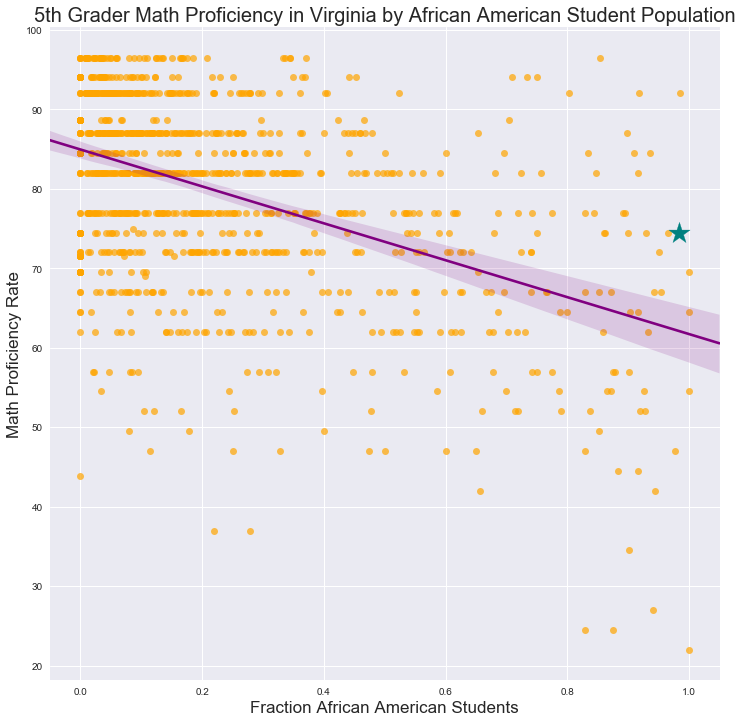

In [81]:
figsize(12, 12)
fig, ax = plt.subplots()
sns.regplot(
    x="black", y="prof",
    data=va[(va.subject == "math") & (va.year == 2017)],
    ci=99,
    scatter_kws=dict(
        alpha=0.7,
        color="orange"
    ),
    line_kws=dict(
        color="purple"
    ),
    ax=ax
)

va[(va.subject == "math") & (va.year == 2017) & (va.fed_school_id == 510324001359)].plot.scatter(
    x="black", y="prof",
    color="teal", marker="*", s=500, ax=ax)


plt.title("5th Grader Math Proficiency in Virginia by African American Student Population", size=20)
plt.xlabel("Fraction African American Students", size=17)
plt.ylabel("Math Proficiency Rate", size=17)
plt.show()

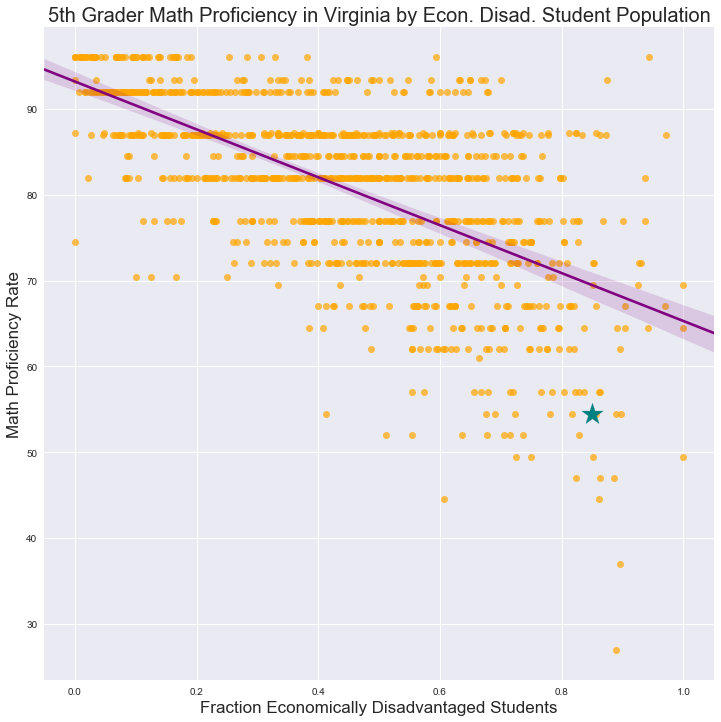

In [79]:
figsize(12, 12)
fig, ax = plt.subplots()
sns.regplot(
    x="disad", y="prof",
    data=va[(va.subject == "math") & (va.year == 2017)],
    ci=99,
    scatter_kws=dict(
        alpha=0.7,
        color="orange"
    ),
    line_kws=dict(
        color="purple"
    ),
    ax=ax
)

va[(va.subject == "math") & (va.year == 2017) & (va.fed_school_id == 510324001359)].plot.scatter(
    x="disad", y="prof",
    color="teal", marker="*", s=500, ax=ax)


plt.title("5th Grader Math Proficiency in Virginia by Econ. Disad. Student Population", size=20)
plt.xlabel("Fraction Economically Disadvantaged Students", size=17)
plt.ylabel("Math Proficiency Rate", size=17)
plt.show()

In [89]:
FORM = """
prof ~
    asian + black +
    disad + homeless + limited_english
"""


def school_ratings(df, formula=FORM):
    all_ratings = None
    for year in df.year.unique():
        for subject in df.subject.unique():
            target = df[(df.year == year) & (df.subject == subject)].copy()
            target["prof"] = target.prof / 100.0
            model = smf.logit(formula, data=target).fit()
            ratings = pd.DataFrame({
                "fed_school_id": target.fed_school_id,
                "resid_{}{}".format(subject, year): model.resid_generalized})
            ratings["decile_{}{}".format(subject, year)] = pd.qcut(
                ratings["resid_{}{}".format(subject, year)],
                10, np.arange(10)).cat.codes.astype(float)
            if all_ratings is None:
                all_ratings = ratings
            else:
                all_ratings = pd.merge(
                    all_ratings, ratings,
                    on="fed_school_id", how="outer")
    return all_ratings

In [90]:
rat = school_ratings(va)

Optimization terminated successfully.
         Current function value: 0.400467
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.395274
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.389243
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.358016
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.363073
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.343452
         Iterations 6


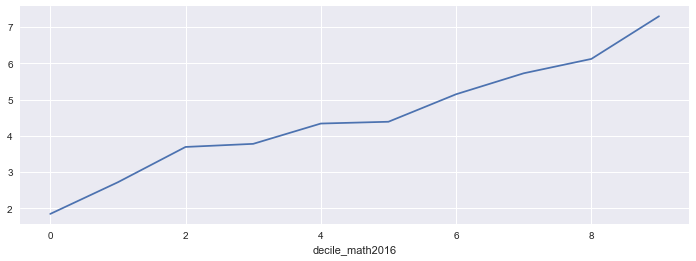

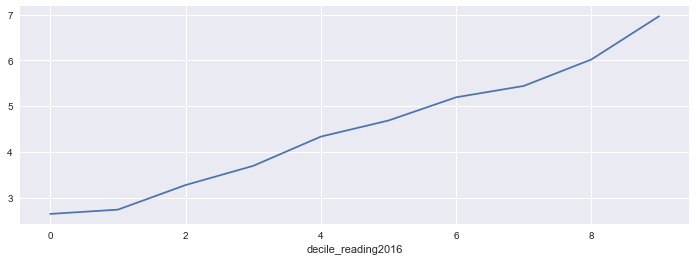

In [92]:
figsize(12, 4)

rat.groupby("decile_math2016").decile_math2017.mean().plot()
plt.show()

rat.groupby("decile_reading2016").decile_reading2017.mean().plot()
plt.show()

In [93]:
va2017 = pd.merge(
    prof[
        (prof.state == "VIRGINIA")
        & (prof.year == 2017)
    ],
    rat,
    on="fed_school_id",
    how="left")

In [94]:
smf.ols(
    FORM + " + decile_reading2015 + decile_reading2016 + decile_math2015 + decile_math2016",
    data=va2017[va2017.subject == "math"]
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prof   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     166.6
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          2.65e-196
Time:                        14:41:57   Log-Likelihood:                -3733.7
No. Observations:                1076   AIC:                             7487.
Df Residuals:                    1066   BIC:                             7537.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             78.4358      0.825     95.033      0.000      76.816      80.055
asian                 15.3331      3.097      4.951      0.000       9.256      21.410
black                -17.0762      1.191    -14.338      0.000     -19.413     -14.739
disad                 -9.5740      1.461     -6.555      0.000     -12.440      -6.708
homeless             -35.6759      9.748     -3.660      0.000     -54.803     -16.548
limited_english      -36.1793      3.573    -10.125      0.000     -43.191     -29.168
decile_reading2015     0.4195      0.109      3.841      0.000       0.205       0.634
decile_reading2016     0.3136      0.109      2.870      0.004       0.099       0.528
decile_math2015        0.5687      0.115      4.936      0.000       0.343       0.795
decile_math2016        1.1234      0.112      9.991      0.000       0.903       1.344
==============================================================================
Omnibus:                       96.282   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.867
Skew:                          -0.576   Prob(JB):                     2.64e-41
Kurtosis:                       4.685   Cond. No.                         415.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

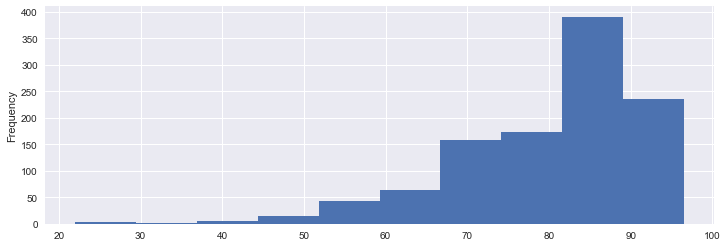

In [95]:
va2017.prof[va2017.subject == "math"].plot.hist(bins=10)

In [98]:
rat[rat.fed_school_id == 510324001359].T

,819
fed_school_id,5.103240e+11
resid_math2015,1.036291e-01
decile_math2015,8.000000e+00
resid_reading2015,4.908695e-02
decile_reading2015,7.000000e+00
resid_math2016,1.604385e-01
decile_math2016,9.000000e+00
resid_reading2016,7.984419e-02
decile_reading2016,8.000000e+00
resid_math2017,1.429225e-01
